Load DKD mouse slide-seq v2 slice dataset from pysodb (https://pysodb.readthedocs.io/en/latest/installation/installation.html)

In [1]:
import pysodb 
import scanpy as sc
import anndata as ad 

import pysodb

sodb = pysodb.SODB()

experiment_list = sodb.list_experiment_by_dataset('Marshall2022High_mouse')

adata_list = []


for i, e in enumerate(experiment_list):
    adata = sodb.load_experiment('Marshall2022High_mouse',e)
    adata.obs['x'] = adata.obsm['spatial'][...,0]
    adata.obs['y'] = adata.obsm['spatial'][...,1]
    adata_list.append(adata)
    
adata = ad.concat(adata_list, label='slice_id')

adata = adata[adata.obs['disease'].isin(['diabetic kidney disease', 'normal'])].copy()
adata.obs['condition'] = (adata.obs['disease'] == 'diabetic kidney disease').astype(int)

ct_obs = 'cell_type'
batch_obs = 'slice_id'

load experiment[Puck_191109_09] in dataset[Marshall2022High_mouse]
load experiment[Puck_191112_02] in dataset[Marshall2022High_mouse]
load experiment[Puck_191223_04] in dataset[Marshall2022High_mouse]
load experiment[Puck_191223_14] in dataset[Marshall2022High_mouse]
load experiment[Puck_200104_10] in dataset[Marshall2022High_mouse]
load experiment[Puck_191109_20] in dataset[Marshall2022High_mouse]
load experiment[Puck_191204_16] in dataset[Marshall2022High_mouse]
load experiment[Puck_191109_19] in dataset[Marshall2022High_mouse]
load experiment[Puck_200127_01] in dataset[Marshall2022High_mouse]
load experiment[Puck_200210_03] in dataset[Marshall2022High_mouse]
load experiment[Puck_200104_04] in dataset[Marshall2022High_mouse]
load experiment[Puck_191223_11] in dataset[Marshall2022High_mouse]
load experiment[Puck_191223_18] in dataset[Marshall2022High_mouse]
load experiment[Puck_191109_07] in dataset[Marshall2022High_mouse]
load experiment[Puck_191204_03] in dataset[Marshall2022High_mo

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Apply Taichi by DKD condition

In [3]:
import time
from Taichi.model import Taichi


import scanpy as sc 
import time
import numpy as np
import anndata as ad

start_time = time.time()

model = Taichi(adata, ct_obs=ct_obs, slice_id=batch_obs)

model.mender_init(scale=4, radius=50, nn_mode='radius')

model.run_mender(n_process=200)

model.label_refinement()

res = model.graph_diffusion()

end_time = time.time()

print(f'Total Running Time {end_time - start_time}')

default number of process is 200
total batch: 60, running batch 0
total batch: 60, running batch 1
scale 0, median #cells per radius (r=50): 14.0
scale 0, median #cells per radius (r=50): 10.0
total batch: 60, running batch 2
scale 1, median #cells per radius (r=50): 38.0
scale 0, median #cells per radius (r=50): 10.0
scale 1, median #cells per radius (r=50): 26.0
total batch: 60, running batch 3
scale 1, median #cells per radius (r=50): 28.0
scale 2, median #cells per radius (r=50): 43.0
total batch: 60, running batch 4
scale 0, median #cells per radius (r=50): 14.0
scale 2, median #cells per radius (r=50): 62.0
scale 0, median #cells per radius (r=50): 7.0
scale 2, median #cells per radius (r=50): 46.0
total batch: 60, running batch 5
scale 1, median #cells per radius (r=50): 19.0
scale 3, median #cells per radius (r=50): 59.0
scale 1, median #cells per radius (r=50): 40.0
scale 3, median #cells per radius (r=50): 63.0
scale 2, median #cells per radius (r=50): 31.0
total batch: 60, r

DKD-relevant niches visualization

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:78: UserWarning: 

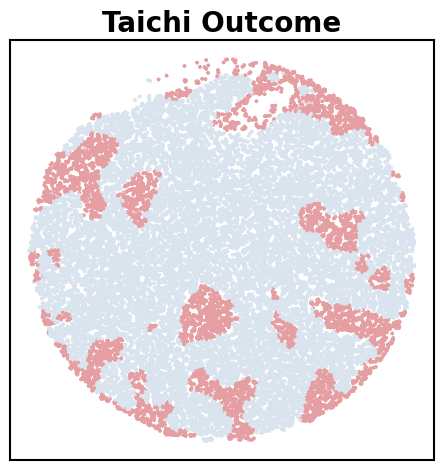

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

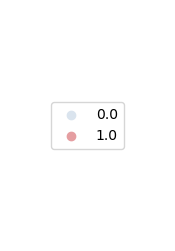

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:114: UserWarning:

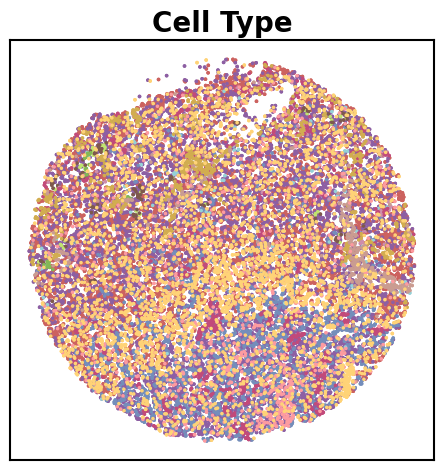

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

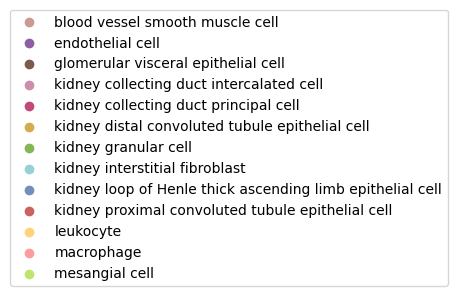

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


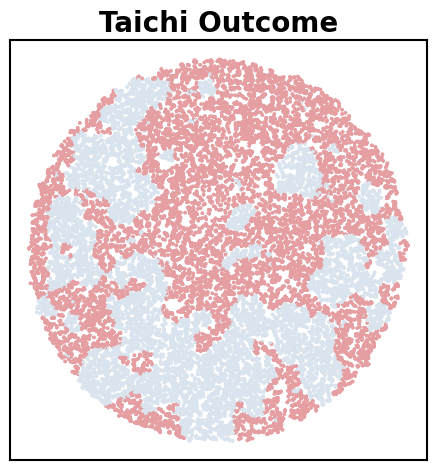

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

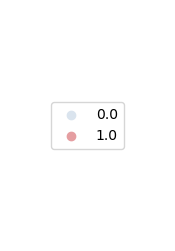

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:114: UserWarning:

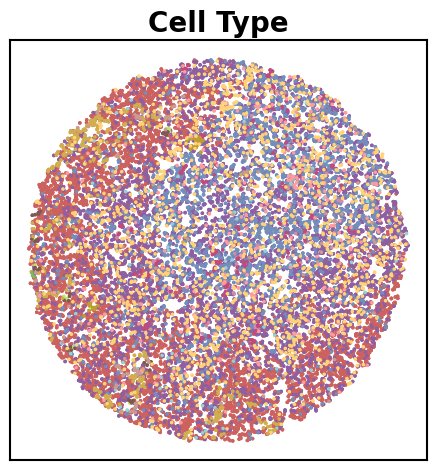

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

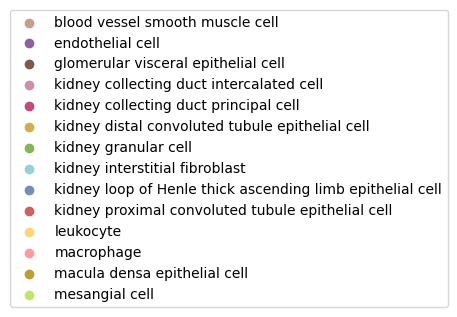

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


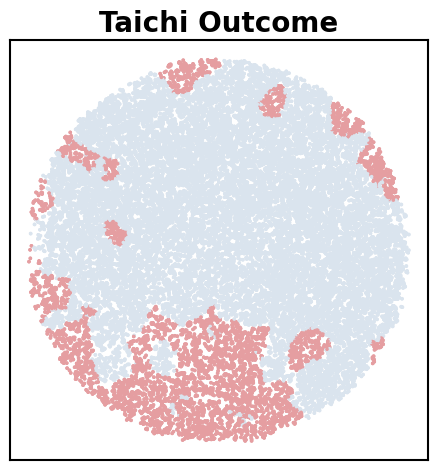

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

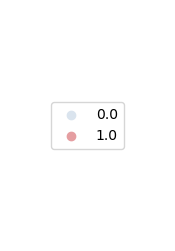

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/tmp/ipykernel_941726/905924774.py:114: UserWarning:

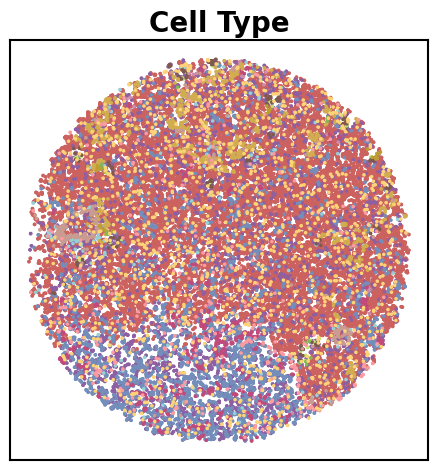

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

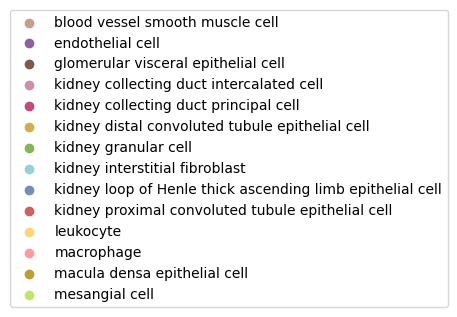

In [4]:
import squidpy as sq 

import scanpy as sc 

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15

batch_obs = 'slice_id'
ct_obs = 'cell_type'


palette = ['#CA9C91', '#8D5FA3', '#7E594D', '#CE8DAC', '#C24A7A', '#D2AD50', '#83B756',
           '#95D1D7', '#748EBB', '#CC625F', '#FFD377', '#FD9BA0', '#BE9E33', '#C0E56F']



res_palette = ['#DAE4EE', '#E59EA1']

train_adata = res.copy()

d = {c: palette[i] for i, c  in enumerate(train_adata.obs[ct_obs].cat.categories)}

train_adata.obs['new_labels'] = train_adata.obs['new_labels'].astype('category')

_, control_index = train_adata[train_adata.obs['condition'] == 0].obs[batch_obs].factorize()
_, condition_index = train_adata[train_adata.obs['condition'] == 1].obs[batch_obs].factorize()


adata_1 = train_adata[train_adata.obs[batch_obs].isin([control_index[0]])].copy()
adata_2 = train_adata[train_adata.obs[batch_obs].isin([condition_index[3]])].copy()
adata_3 = train_adata[train_adata.obs[batch_obs].isin([condition_index[4]])].copy()
adata_4 = train_adata[train_adata.obs[batch_obs].isin([condition_index[5]])].copy()

adata_list = [adata_2, adata_3, adata_4]

d = {c: palette[i] for i, c  in enumerate(train_adata.obs[ct_obs].cat.categories)}

for k, adata in enumerate(adata_list):

    
    data = adata.obsm['spatial']
        
    clf = LocalOutlierFactor(n_neighbors=2, contamination=0.2)
    is_inlier = clf.fit_predict(data) == 1

    g = sq.pl.spatial_scatter(adata[is_inlier], shape=None, color=['new_labels'],  return_ax=True, ncols=1, size=10, wspace=0.1, hspace=0.1, palette=ListedColormap(res_palette))

    all_handles_labels = []

    g = [g]

    for i, ax in enumerate(g):
        ax.get_legend().remove()
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in [l for _, l in all_handles_labels]:
                all_handles_labels.append((handle, label))
        '''for spine in ax.spines.values():
            spine.set_visible(False)'''
        ax.legend().remove()
        ax.set_title('Taichi Outcome') 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    plt.tight_layout()
    plt.show()

    unique_handles_labels =  dict(all_handles_labels).items()

    # Create a new figure for the comprehensive legend
    fig_legend, ax_legend = plt.subplots(figsize=(2, 3))  # Adjust size as needed
    fig_legend.legend(*zip(*unique_handles_labels), loc='center')
    ax_legend.axis('off')
    plt.show()

    cat = adata[is_inlier].obs[ct_obs].cat.categories
    
    t_p = [d[c] for c in cat]

    g = sq.pl.spatial_scatter(adata[is_inlier], shape=None, color=[ct_obs],  return_ax=True, ncols=1, size=10, wspace=0.1, hspace=0.1, palette=ListedColormap(t_p))

    all_handles_labels = []

    g = [g]

    for i, ax in enumerate(g):
        ax.get_legend().remove()
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in [l for _, l in all_handles_labels]:
                all_handles_labels.append((handle, label))
        '''for spine in ax.spines.values():
            spine.set_visible(False)'''
        ax.legend().remove()
        ax.set_title('Cell Type') 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    plt.tight_layout()
    plt.show()

    unique_handles_labels =  dict(all_handles_labels).items()

    # Create a new figure for the comprehensive legend
    fig_legend, ax_legend = plt.subplots(figsize=(2, 3))  # Adjust size as needed
    fig_legend.legend(*zip(*unique_handles_labels), loc='center')
    ax_legend.axis('off')
    plt.show()

Identification of the DKD-relevant niches specifical spatially varible genes by Spagcn(https://github.com/jianhuupenn/SpaGCN)

In [ ]:
import numpy as np
import scanpy as sc 
import SpaGCN as spg
from scipy.sparse import issparse


import scanpy as sc 
import SpaGCN as spg
from scipy.sparse import issparse


raw_1 = adata_4.copy()

sc.pp.normalize_total(raw_1, 1e5)
sc.pp.log1p(raw_1)

raw_1.X = raw_1.X.toarray()

target = 1

#Use domain 0 as an example
#target='PVT'
#Set filtering criterials
min_in_group_fraction=0.8
min_in_out_group_ratio=1
min_fold_change=1.5
#Search radius such that each spot in the target domain has approximately 10 neighbors on average
adj_2d=spg.calculate_adj_matrix(x=raw_1.obs["x"].tolist(), y=raw_1.obs["y"].tolist(), histology=False)
start, end= np.quantile(adj_2d[adj_2d!=0],q=0.000001), np.quantile(adj_2d[adj_2d!=0],q=0.1)
r=spg.search_radius(target_cluster=target, cell_id=raw_1.obs.index.tolist(), x=raw_1.obs["x"].tolist(), y=raw_1.obs["y"].tolist(), pred=raw_1.obs["new_labels"].tolist(), start=start, end=end, num_min=10, num_max=14,  max_run=100)
#Detect neighboring domains
nbr_domians=spg.find_neighbor_clusters(target_cluster=target,
                            cell_id=raw_1.obs.index.tolist(), 
                            x=raw_1.obs["x"].tolist(), 
                            y=raw_1.obs["y"].tolist(), 
                            pred=raw_1.obs["new_labels"].tolist(),
                            radius=r,
                            ratio=1/2)

nbr_domians=nbr_domians[0:3]
de_genes_info=spg.rank_genes_groups(input_adata=raw_1,
                            target_cluster=target,
                            nbr_list=nbr_domians, 
                            label_col="new_labels", 
                            adj_nbr=True, 
                            log=True)
#Filter genes
de_genes_info=de_genes_info[(de_genes_info["pvals_adj"]<0.05)]
filtered_info=de_genes_info
filtered_info=filtered_info[(filtered_info["pvals_adj"]<0.05) &
                        (filtered_info["in_out_group_ratio"]>min_in_out_group_ratio) &
                        (filtered_info["in_group_fraction"]>min_in_group_fraction) &
                        (filtered_info["fold_change"]>min_fold_change)]
filtered_info_1=filtered_info.sort_values(by="in_group_fraction", ascending=False)
filtered_info_1["target_dmain"]=target
filtered_info_1["neighbors"]=str(nbr_domians)
print("SVGs for domain ", str(target),":", filtered_info_1["genes"].tolist())


In [ ]:
import matplotlib.colors as clr

target=1
meta_name, meta_exp=spg.find_meta_gene(input_adata=raw_1,
                    pred=raw_1.obs["new_labels"].tolist(),
                    target_domain=target,
                    start_gene='ENSMUSG00000028307',
                    mean_diff=0,
                    early_stop=True,
                    max_iter=10,
                    use_raw=False)


raw_1.obs['meta_1'] =  meta_exp

g = sq.pl.spatial_scatter(raw_1, shape=None, color=['meta_1'], return_ax=True)

Draw the co occurrence score distribution

100%|██████████| 1/1 [00:03<00:00,  3.05s/]
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family '

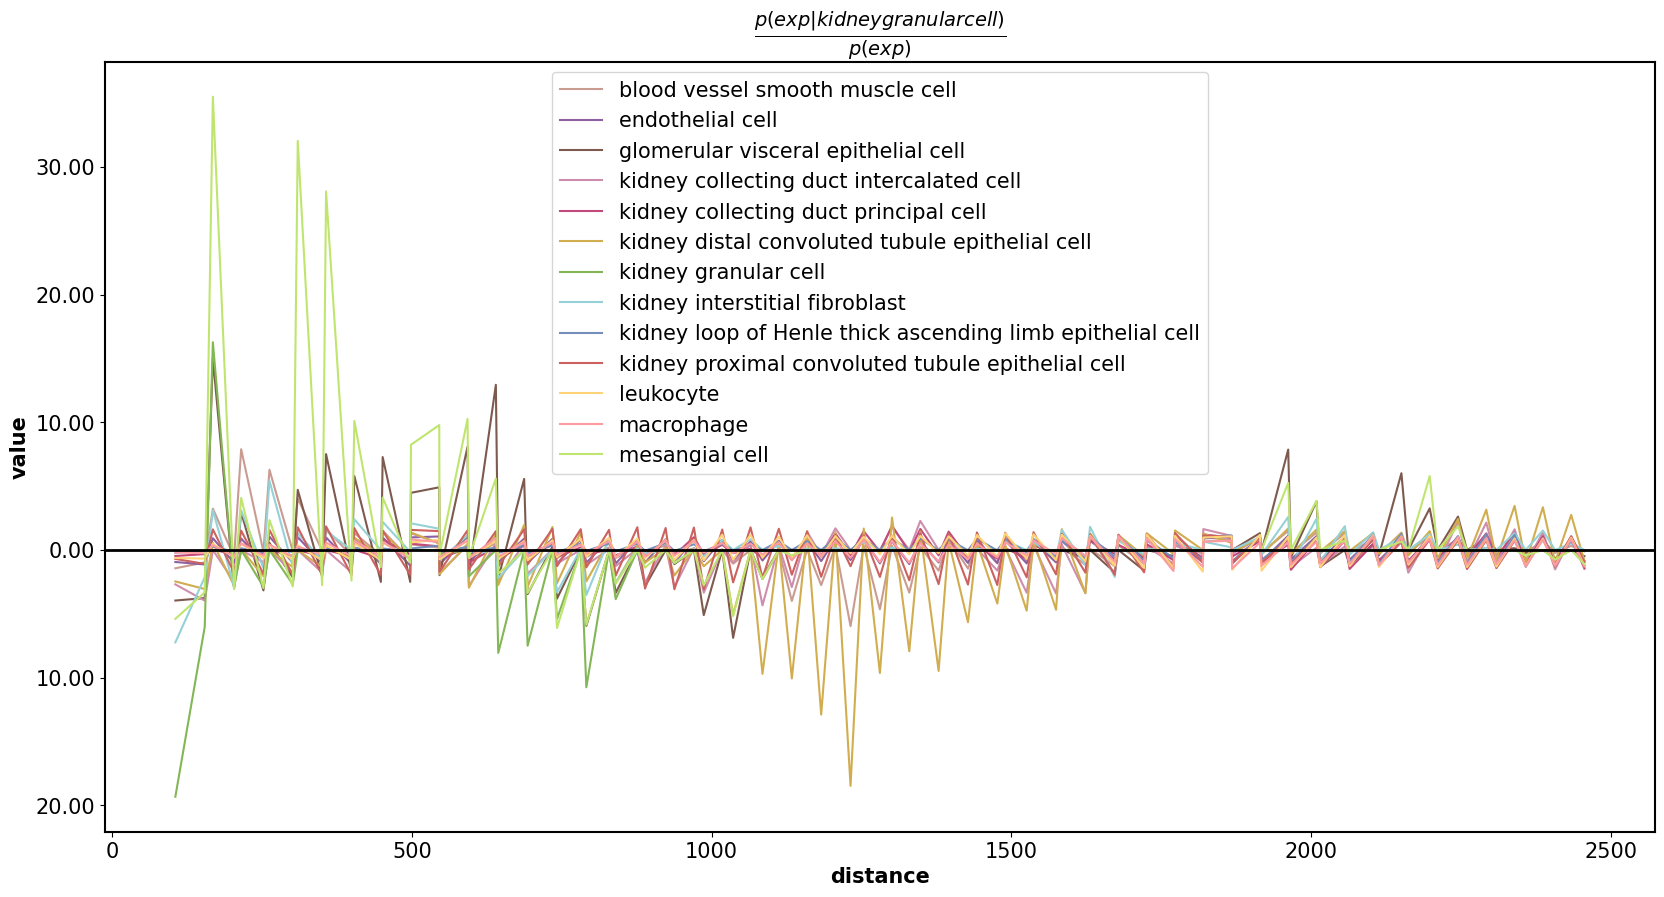

In [5]:
from squidpy.gr._utils import (
    _assert_categorical_obs,
    _assert_non_empty_sequence,
    _get_valid_values,
)


from squidpy._constants._pkg_constants import Key

from squidpy.gr._utils import (
    _assert_categorical_obs,
    _assert_non_empty_sequence,
    _get_valid_values,
)

import numpy as np

from squidpy._constants._pkg_constants import Key

import pandas as pd

from squidpy.pl._color_utils import Palette_t, _get_palette, _maybe_set_colors

import pandas as pd
import numpy as np

from anndata import AnnData
from typing import (
    TYPE_CHECKING,
    Any,
    Literal,
    Mapping,
    Sequence,
    Union,  # noqa: F401
)


def _get_data(adata: AnnData, cluster_key: str, func_name: str, attr: str = "uns", **kwargs) -> Any:
    key = getattr(Key.uns, func_name)(cluster_key, **kwargs)

    try:
        if attr == "uns":
            return adata.uns[key]
        elif attr == "obsm":
            return adata.obsm[key]
        else:
            raise ValueError(f"attr must be either 'uns' or 'obsm', got {attr}")
    except KeyError:
        raise KeyError(
            f"Unable to get the data from `adata.uns[{key!r}]`. "
            f"Please run `squidpy.gr.{func_name}(..., cluster_key={cluster_key!r})` first."
        ) from None


x_2 = adata_2[adata_2.obs['new_labels'] == 1].copy()
x_1 = adata_2[adata_2.obs['new_labels'] == 0].copy()

clusters = 'kidney granular cell'

sq.gr.spatial_neighbors(x_1)
sq.gr.co_occurrence(x_1, cluster_key=ct_obs)

occurrence_data = _get_data(x_1, cluster_key=ct_obs, func_name="co_occurrence")

cluster_key = ct_obs

out = occurrence_data["occ"]
interval = occurrence_data["interval"][1:]
categories = x_1.obs[cluster_key].cat.categories


idx = np.where(categories == clusters)[0][0]
df_1 = pd.DataFrame(out[idx, :, :].T, columns=categories).melt(var_name=cluster_key, value_name="probability")
df_1["distance"] = np.tile(interval, len(categories))


sq.gr.spatial_neighbors(x_2)
sq.gr.co_occurrence(x_2, cluster_key=ct_obs)

occurrence_data = _get_data(x_2, cluster_key=ct_obs, func_name="co_occurrence")

cluster_key = ct_obs

out = occurrence_data["occ"]
interval = occurrence_data["interval"][1:]
categories = x_2.obs[cluster_key].cat.categories

idx = np.where(categories == clusters)[0][0]
df_2 = pd.DataFrame(out[idx, :, :].T, columns=categories).melt(var_name=cluster_key, value_name="probability")
df_2["distance"] = np.tile(interval, len(categories))
df_2['probability'] = -df_2['probability']
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from squidpy.pl._color_utils import Palette_t, _get_palette, _maybe_set_colors


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15



df = pd.concat([df_1, df_2], ignore_index=True)

plt.figure(figsize=(20, 10))

import palettable
from matplotlib.colors import  ListedColormap

cat = adata_2.obs[ct_obs].cat.categories

t_p = [d[c] for c in cat]

sns.lineplot(
    x="distance",
    y="probability",
    data=df,
    dashes=False,
    hue=cluster_key,
    hue_order=categories,
    palette = t_p
)
           

ax = plt.gca()

ax.axhline(0, color='black', linewidth=2)

def abs_formatter(x, pos):
    return f"{abs(x):.2f}"
ax.yaxis.set_major_formatter(FuncFormatter(abs_formatter))


ax.set_title(rf"$\frac{{p(exp|{clusters})}}{{p(exp)}}$")
ax.set_ylabel("value")
ax.grid(False)


plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Draw the cell proportion correlation

In [2]:
import scanpy as sc

res = sc.read_h5ad('/home/cuiyan/mms/kidney.h5ad')

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
batch_obs = 'slice_id'
ct_obs = 'cell_type'

adata = res.copy()

wt = adata[adata.obs['disease'] == 'normal'].copy()
obs = adata[adata.obs['disease'] == 'diabetic kidney disease'].copy()

obs_neg = obs[obs.obs['new_labels'] == 0.0]
obs_pos = obs[obs.obs['new_labels'] == 1.0]

obs_1 = (obs_pos.obs['cell_type'].value_counts() / obs_pos.shape[0])

obs_0 = (obs_neg.obs['cell_type'].value_counts() / obs_neg.shape[0])

wt_t = (wt.obs['cell_type'].value_counts() / wt.shape[0])

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
ct = wt.obs['cell_type'].cat.categories 

palette = ['#CA9C91', '#8D5FA3', '#7E594D', '#CE8DAC', '#C24A7A', '#D2AD50', '#83B756',
           '#95D1D7', '#748EBB', '#CC625F', '#FFD377', '#FD9BA0', '#BE9E33', '#C0E56F']

ct_colors = {ct[i] : palette[i] for i in range(len(palette))}

wt_t = {ct[i]: v for i, v in enumerate(wt_t)}

obs_1 = {ct[i] : v for i, v in enumerate(obs_1)}
obs_0 = {ct[i] : v for i, v in enumerate(obs_0)}

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

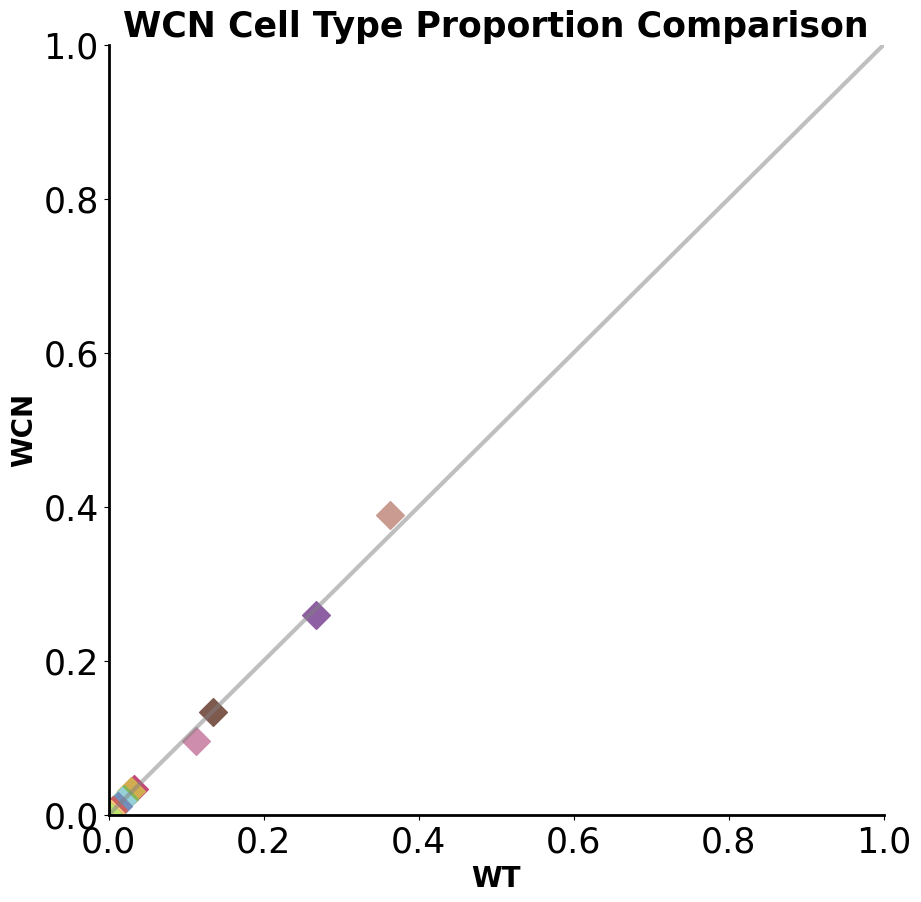

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

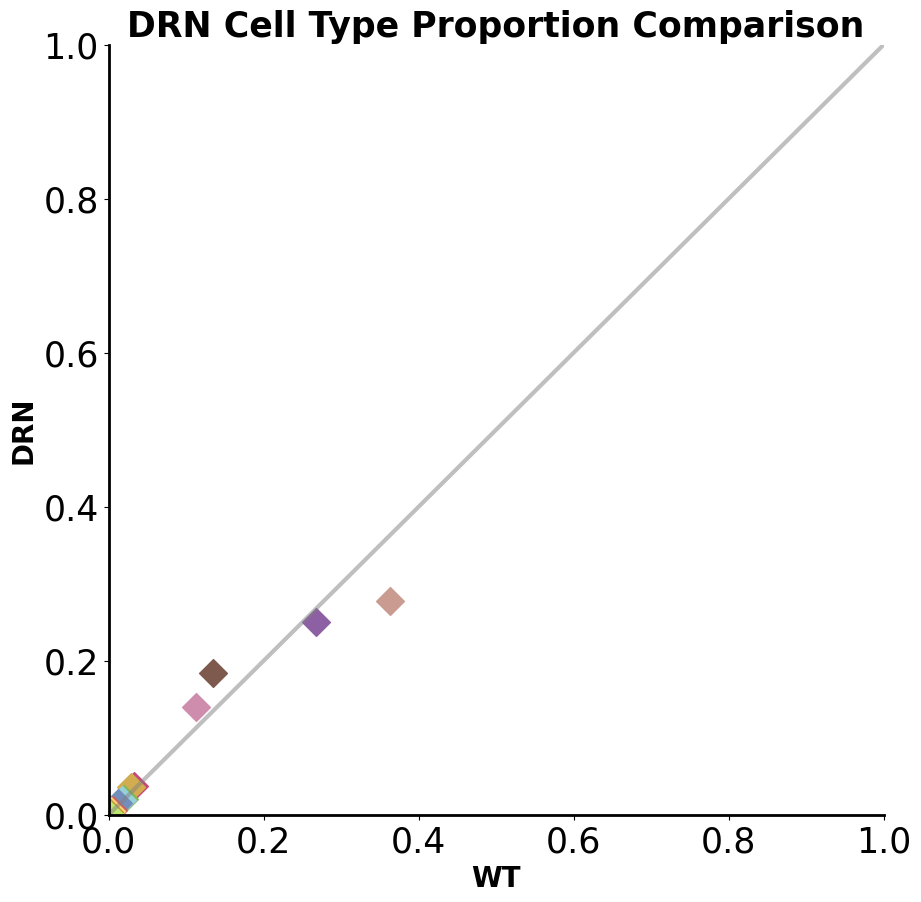

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

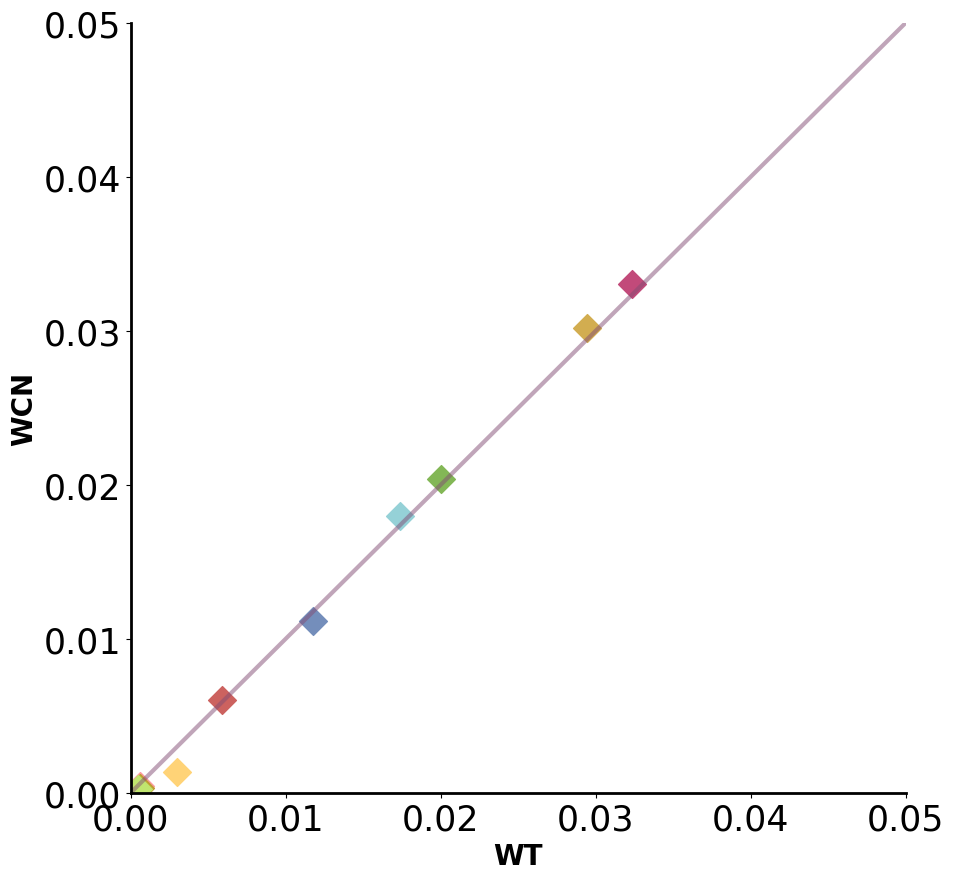

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

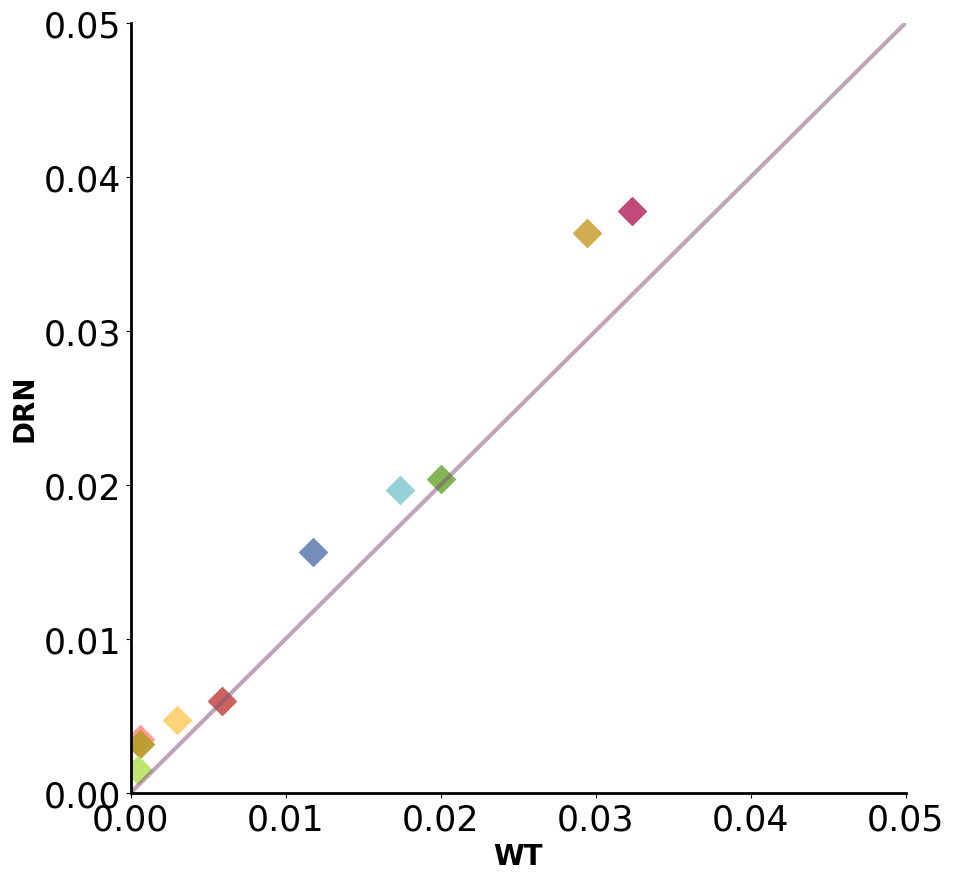

In [7]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr 
from scipy.spatial.distance import cosine 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 25  # Adjust title size
plt.rcParams['axes.labelsize'] = 20

'''def get_corr(x_values, y_values):
    corr_coefficient, _ = pearsonr(x_values, y_values)
    spearman, _ = spearmanr(x_values, y_values)
    cos = 1 - cosine(np.array(x_values), np.array(y_values))
    rmse = mean_squared_error(np.array(x_values).reshape(-1,1), np.array(y_values).reshape(-1,1))
    
    return corr_coefficient, spearman, cos, rmse, list(zip(x_values, y_values))'''

def draw(proportions_dict1, proportions_dict2, title_suffix):
    colors = ct_colors  # Example color map for 3 cell types


    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    # Plot each cell type with its own color
    for cell_type in proportions_dict1:
        x_values = [proportions_dict1[cell_type]]
        y_values = [proportions_dict2[cell_type]]
        #corr_coefficient, _, _, _, _ = get_corr(x_values, y_values)
        plt.scatter(x_values, y_values, color=colors[cell_type], label=f'{cell_type}', marker='D', s=200)
        
    plt.plot([0, 1], [0, 1], 'grey', label='y=x', alpha=0.5, linewidth=3)
    plt.title(f'{title_suffix} Cell Type Proportion Comparison')
    plt.xlabel('WT')
    plt.ylabel(title_suffix)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend().remove()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(False)
    plt.show()

def draw_smaller(proportions_dict1, proportions_dict2, title_suffix):
    colors =  ct_colors   # Define colors for cell types

    plt.figure(figsize=(10, 10))
    ax = plt.gca()  # Get current axis
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)  # Make left spine thicker and darker
    ax.spines['bottom'].set_linewidth(2)

    # Loop through each cell type and plot if within the specified range
    for cell_type, color in colors.items():
        x_value = proportions_dict1.get(cell_type, None)
        y_value = proportions_dict2.get(cell_type, None)

        # Check if both x and y values are within the specified range and are not None
        if x_value is not None and y_value is not None and 0.0 <= x_value <= 0.05 and 0.0 <= y_value <= 0.05:
            plt.scatter([x_value], [y_value], color=color, label=f'{cell_type}', marker='D', s=200)

    plt.plot([0, 0.05], [0, 0.05], '#824D74', label='y=x', alpha=0.5, linewidth=3)  # Reference line within the filtered range
    plt.xlim(0.0, 0.05)
    plt.ylim(0.0, 0.05)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('WT')
    plt.ylabel(title_suffix)
    plt.legend().remove()
    plt.grid(False)
    plt.show()
# Example usage with m

draw(wt_t, obs_0, 'WCN')
draw(wt_t, obs_1, 'DRN') 
draw_smaller(wt_t, obs_0, 'WCN')
draw_smaller(wt_t, obs_1, 'DRN') 

Analysis the cell proportion distribution

In [8]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr 
from scipy.spatial.distance import cosine 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def get_corr(proportions_dict1, proportions_dict2):
    common_keys = list(set(proportions_dict1.keys().values) & set(proportions_dict2.keys().values))
    
    
    x_values = [proportions_dict1[key] for key in common_keys]
    y_values = [proportions_dict2[key] for key in common_keys]
    
    corr_coefficient, _ = pearsonr(x_values, y_values)
    spearman, _ = spearmanr(x_values, y_values)
    cos = 1 - cosine(np.array(x_values), np.array(y_values))
    rmse = mean_squared_error(np.array(x_values).reshape(-1,1), np.array(y_values).reshape(-1,1))
    
    return corr_coefficient, spearman, cos, rmse, list(zip(x_values, y_values))

corrs_1 = []
sp_1 = []
cos_1 = []
r_1 = []
points_1 = []
for s_1 in obs_neg.obs['slice_id'].unique():
    for s_2 in wt.obs['slice_id'].unique():
        slice_1 = obs_neg[obs_neg.obs['slice_id'] == s_1]
        slice_2 = wt[wt.obs['slice_id'] == s_2]
        corr, spearman, cos, rmse, point = get_corr((slice_1.obs['cell_type'].value_counts() / slice_1.shape[0]), (slice_2.obs['cell_type'].value_counts() / slice_2.shape[0]))
        sp_1.append(spearman)
        cos_1.append(cos)
        r_1.append(rmse)
        corrs_1.append(corr)
        points_1.extend(point)
        
corrs_2 = []
sp_2 = []
cos_2 = []
r_2 = []
points_2 = []
for s_1 in obs_pos.obs['slice_id'].unique():
    for s_2 in wt.obs['slice_id'].unique():
        slice_1 = obs_pos[obs_pos.obs['slice_id'] == s_1]
        slice_2 = wt[wt.obs['slice_id'] == s_2]
        corr, spearman, cos, rmse, point = get_corr((slice_1.obs['cell_type'].value_counts() / slice_1.shape[0]), (slice_2.obs['cell_type'].value_counts() / slice_2.shape[0]))
        sp_2.append(spearman)
        cos_2.append(cos)
        r_2.append(rmse)
        corrs_2.append(corr)

        
corrs_3 = []
sp_3 = []
cos_3 = []
r_3 = []
for s_1 in obs.obs['slice_id'].unique():
    for s_2 in wt.obs['slice_id'].unique():
        slice_1 = obs[obs.obs['slice_id'] == s_1]
        slice_2 = wt[wt.obs['slice_id'] == s_2]
        corr, spearman, cos, rmse, point = get_corr((slice_1.obs['cell_type'].value_counts() / slice_1.shape[0]), (slice_2.obs['cell_type'].value_counts() / slice_2.shape[0]))
        sp_3.append(spearman)
        cos_3.append(cos)
        r_3.append(rmse)
        corrs_3.append(corr)


corrs_4 = []
sp_4 = []
cos_4 = []
r_4 = []
for s_1 in wt.obs['slice_id'].unique():
    for s_2 in wt.obs['slice_id'].unique():
        slice_1 = wt[wt.obs['slice_id'] == s_1]
        slice_2 = wt[wt.obs['slice_id'] == s_2]
        corr, spearman, cos, rmse, point = get_corr((slice_1.obs['cell_type'].value_counts() / slice_1.shape[0]), (slice_2.obs['cell_type'].value_counts() / slice_2.shape[0]))
        sp_4.append(spearman)
        cos_4.append(cos)
        r_4.append(rmse)
        corrs_4.append(corr)

In [8]:
colors = ['#4292C6', '#86B5A1', '#B95A58', '#7976A2', '#4A5E65', '#E29957']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{('ob_neg_wt', 'ob_pos_wt'): 1.0204326865981268e-21, ('ob_neg_wt', 'wt_wt'): 6.13359754577968e-12, ('ob_pos_wt', 'wt_wt'): 1.536078633446183e-64}


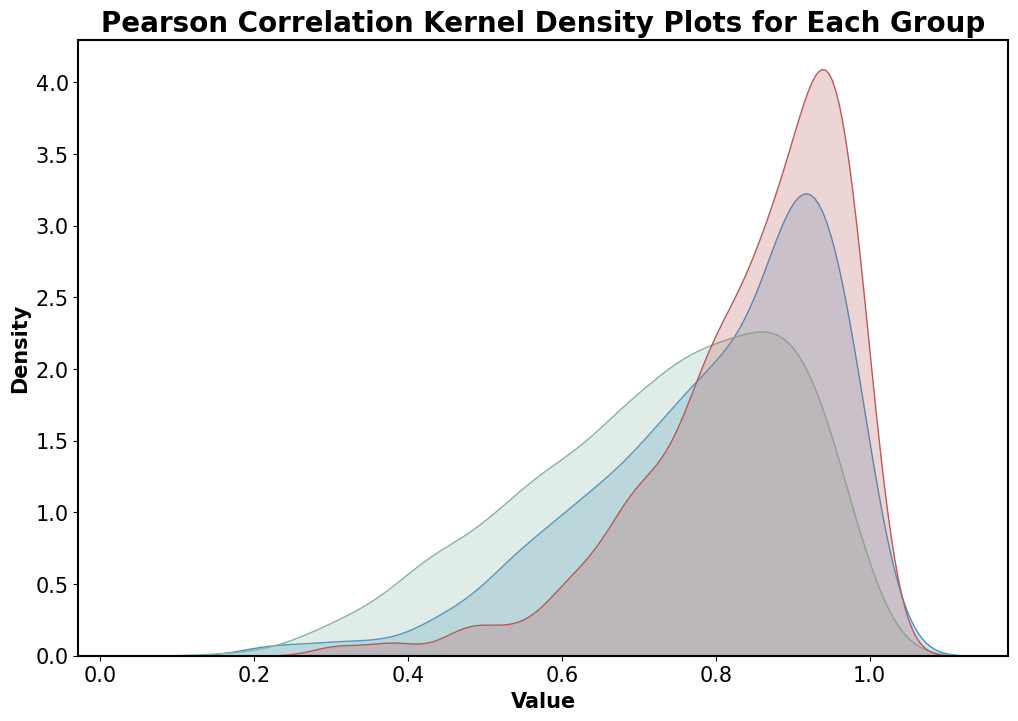

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

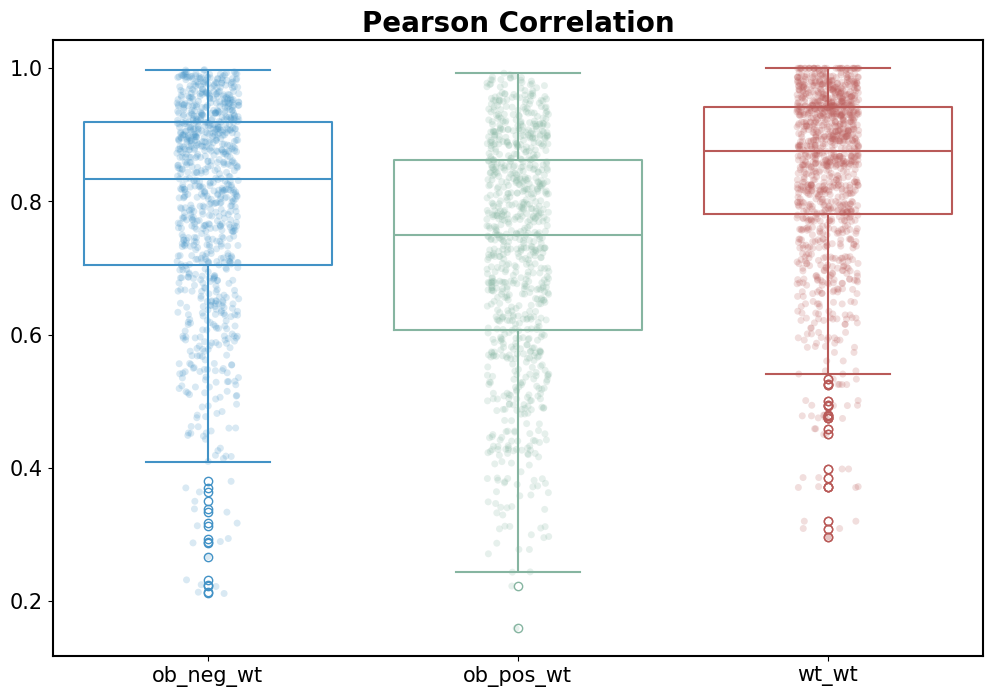

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{('ob_neg_wt', 'ob_pos_wt'): 1.0560797143404035e-37, ('ob_neg_wt', 'wt_wt'): 6.822176969656804e-11, ('ob_pos_wt', 'wt_wt'): 1.2350800056689182e-104}


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

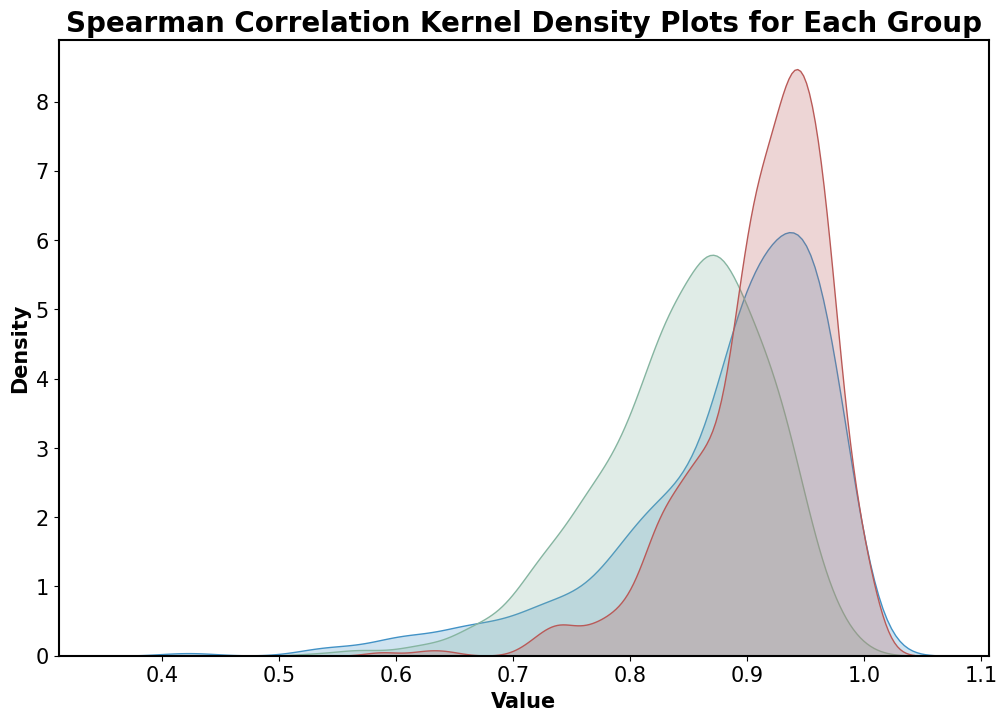

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

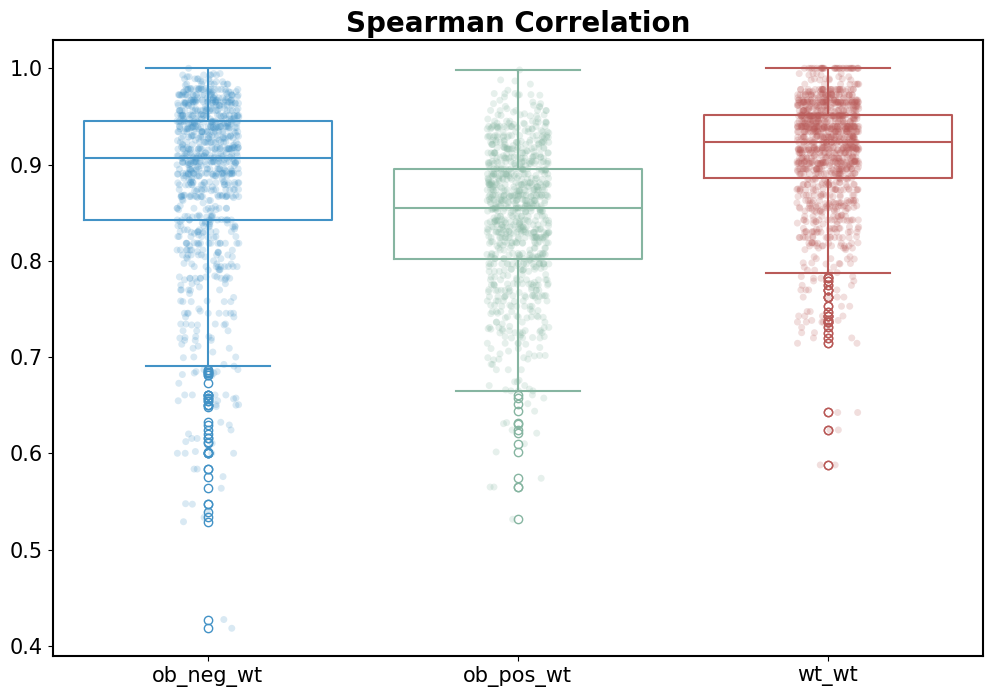

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{('ob_neg_wt', 'ob_pos_wt'): 1.3400214718003277e-20, ('ob_neg_wt', 'wt_wt'): 1.404552009007885e-11, ('ob_pos_wt', 'wt_wt'): 2.0531070801075307e-61}


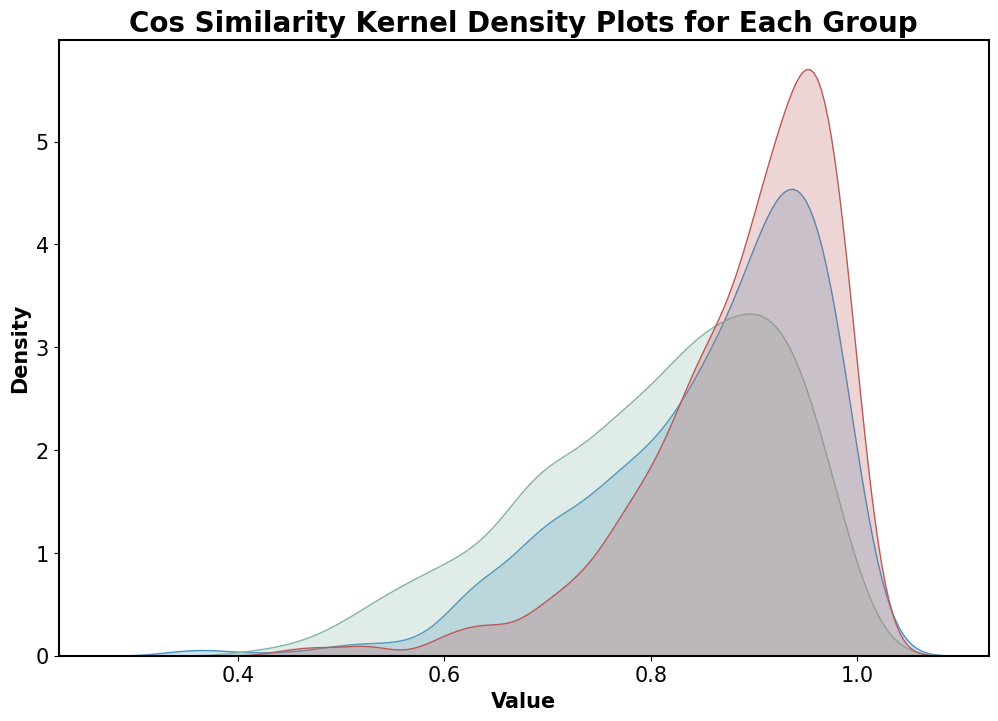

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

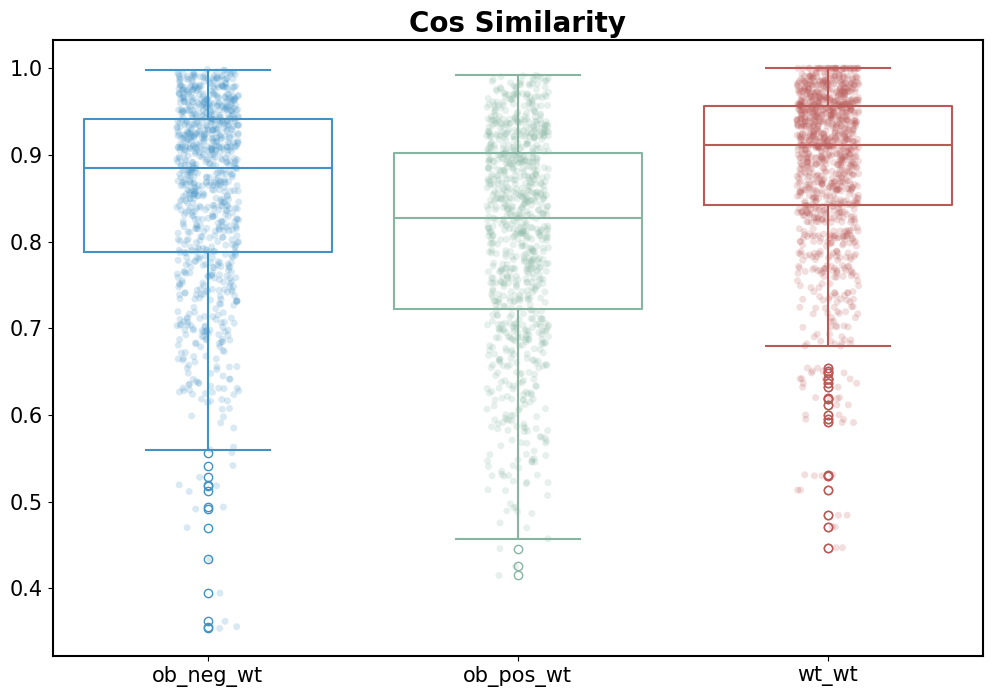

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import itertools
import numpy as np

from matplotlib.colors import ListedColormap


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15


m_list = ['Pearson Correlation', 'Spearman Correlation', 'Cos Similarity']

# Example data setup, continue using your loops and data input
for k, l in enumerate([(corrs_1, corrs_2, corrs_3, corrs_4), (sp_1, sp_2, sp_3, sp_4), (cos_1, cos_2, cos_3, cos_4)]):
    list1 = l[0]
    list2 = l[1]
    list3 = l[2]
    list4 = l[3]

    # Creating a DataFrame
    data = pd.DataFrame({
        'ob_neg_wt': pd.Series(list1),
        'ob_pos_wt': pd.Series(list2),
        'wt_wt': pd.Series(list4)
    }).melt(var_name='Group', value_name='Value')

    # Pairwise Mann-Whitney U Tests
    combinations = list(itertools.combinations(data['Group'].unique(), 2))
    p_values = {}
    for combo in combinations:
        group1 = data[data['Group'] == combo[0]]['Value'].dropna()
        group2 = data[data['Group'] == combo[1]]['Value'].dropna()
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided', nan_policy='omit')
        p_values[combo] = p

    print(p_values)
    
    colors = ['#4292C6', '#86B5A1', '#B95A58', '#7976A2', '#4A5E65', '#E29957']
    # Plotting all groups' density on one plot
    plt.figure(figsize=(12, 8))
    
    # Plotting kernel density estimation for each group
    for i, group in enumerate(data['Group'].unique()):
        sns.kdeplot(data=data[data['Group'] == group]['Value'], label=group, shade=True, color=colors[i])


    plt.title(f'{m_list[k]} Kernel Density Plots for Each Group')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend().remove()
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(False)
    plt.show()

    plt.figure(figsize=(12, 8))
    
    palette = {"ob_neg_wt": "#4292C6", "ob_pos_wt": "#86B5A1", "wt_wt":"#B95A58"}
    
    sns.boxplot(data=data, x='Group', y='Value', palette=palette, fill=False)
    sns.stripplot(data=data, x='Group', y='Value', dodge=False, palette=palette, alpha=0.2)
    plt.title(m_list[k])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(False)
    plt.xlabel('')
    plt.ylabel('')

    #plt.savefig(f'/home/cy/mms/eps_figure/fig_4_cons_slice_legend.eps', bbox_inches='tight', pad_inches=0, format='eps')


    plt.show()

Draw the CCI difference

In [6]:

from squidpy.gr._utils import (
    _assert_categorical_obs,
    _assert_non_empty_sequence,
    _get_valid_values,
)

import squidpy as sq

from squidpy._constants._pkg_constants import Key

from squidpy.gr._utils import (
    _assert_categorical_obs,
    _assert_non_empty_sequence,
    _get_valid_values,
)

import numpy as np

from squidpy._constants._pkg_constants import Key

import pandas as pd

from squidpy.pl._color_utils import Palette_t, _get_palette, _maybe_set_colors

import pandas as pd
import numpy as np

from anndata import AnnData
from typing import (
    TYPE_CHECKING,
    Any,
    Literal,
    Mapping,
    Sequence,
    Union,  # noqa: F401
)


def _get_data(adata: AnnData, cluster_key: str, func_name: str, attr: str = "uns", **kwargs) -> Any:
    key = getattr(Key.uns, func_name)(cluster_key, **kwargs)

    try:
        if attr == "uns":
            return adata.uns[key]
        elif attr == "obsm":
            return adata.obsm[key]
        else:
            raise ValueError(f"attr must be either 'uns' or 'obsm', got {attr}")
    except KeyError:
        raise KeyError(
            f"Unable to get the data from `adata.uns[{key!r}]`. "
            f"Please run `squidpy.gr.{func_name}(..., cluster_key={cluster_key!r})` first."
        ) from None


full_name = wt.obs['cell_type'].unique()

def fill(matrix1):
    missing_in_matrix1 = set(full_name) - set(matrix1.columns)

    for cat in missing_in_matrix1:
        matrix1[cat] = 0.0
        matrix1.loc[cat] = 0.0
    matrix1 = matrix1.sort_index(axis=1).sort_index(axis=0)

    return matrix1

def ccc_dif(adata_1):
    x_1 =  adata_1
    sq.gr.spatial_neighbors(x_1)
    sq.gr.interaction_matrix(x_1, cluster_key="cell_type", normalized=True)
    array_1 = _get_data(x_1, cluster_key=ct_obs, func_name="interaction_matrix")
    matrix1 = pd.DataFrame(array_1, columns=x_1.obs[ct_obs].cat.categories, index=x_1.obs[ct_obs].cat.categories)
    return matrix1


m_1_1 = []
m_1_2 = []
m_1_3 = []
for s_1 in obs_neg.obs['slice_id'].unique():
    slice_1 = obs_neg[obs_neg.obs['slice_id'] == s_1]
    slice_2 = obs_pos[obs_pos.obs['slice_id'] == s_1]
    slice_3 = obs[obs.obs['slice_id'] == s_1]
    result_1 = ccc_dif(slice_1)
    result_2 = ccc_dif(slice_2)
    result_3 = ccc_dif(slice_3)
    if (np.isnan(result_1.values).sum() == 0) & (np.isnan(result_2.values).sum() == 0):
        if (result_1.values.shape[0]  == 14) & (result_2.values.shape[0] == 14):
            m_1_1.append(result_1)
            m_1_2.append(result_2)
            m_1_3.append(result_3)

corrs_4 = []
m_1_4 = []
for s_1 in wt.obs['slice_id'].unique():
    slice_1 =wt[wt.obs['slice_id'] == s_1]
    result = ccc_dif(slice_1)
    if result.values.shape[0] == 14:
        m_1_4.append(result)

/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/cuiyan/miniconda3/envs/taichi-env/lib/python3.11/site-packages/squidpy/gr/

Hypothesis test for CCI difference

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests



def cliffs_delta(x, y):
    n = len(x)
    m = len(y)
    all_pairs = np.array([1 if xi > yi else -1 if xi < yi else 0 for xi in x for yi in y])
    delta = all_pairs.sum() / (n*m)
    return delta


def get_fdr(matrix1, matrix2, alternative='two-sided'):

    reshaped_matrix1 = matrix1.reshape(matrix1.shape[0], -1)
    reshaped_matrix2 = matrix2.reshape(matrix2.shape[0], -1)

    p_values = []
    effect_sizes = []
    fold_changes = []  
    for i in range(reshaped_matrix1.shape[1]):
        stat, p = mannwhitneyu(reshaped_matrix1[:, i], reshaped_matrix2[:, i], alternative=alternative)
        p_values.append(p)
        effect_size = cliffs_delta(reshaped_matrix1[:, i], reshaped_matrix2[:, i])
        effect_sizes.append(effect_size)

        fold_change = np.mean(reshaped_matrix1[:, i]) / np.mean(reshaped_matrix2[:, i])
        fold_changes.append(fold_change)

    rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')


    index = np.where(rejected)[0]


    print("Indices with FDR < 0.05:", index)
    return index, pvals_corrected, effect_sizes, fold_changes


index_1, x1, _, _ = get_fdr(np.stack(m_1_1, axis=0), np.stack(m_1_4, axis=0))
index_2, x2,  _, _ = get_fdr(np.stack(m_1_2, axis=0), np.stack(m_1_4, axis=0))

Indices with FDR < 0.05: [128]
Indices with FDR < 0.05: [  2   3  16  23  26  27  49 121 128 132 138 142 146 153]


In [17]:
print(x2[index_2], x1[index_1])

[0.0249252  0.01224984 0.00557591 0.00106598 0.03573556 0.00982228
 0.00557591 0.00316307 0.00053299 0.04309457 0.00557591 0.03674838
 0.0465645  0.01224984 0.00557591 0.00017766 0.00017766 0.00017766
 0.00074619 0.00316307 0.00557591]


In [8]:
diff_1 = []
for A in m_1_4:
    for B in m_1_4:
        C = abs(A-B)
        diff_1.append(C.values)

diff_2 = []
for A in m_1_2:
    for B in m_1_4:
        C = abs(A-B)
        diff_2.append(C.values)
        
s_index, p_values, effect_size, fold_change = get_fdr(np.stack(diff_2, axis=0), np.stack(diff_1, axis=0), alternative='greater')

Indices with FDR < 0.05: [  0   2   3   4   6   8  12  13  16  18  20  22  23  26  27  29  30  31
  36  44  45  46  49  50  53  55  59  60  64  68  72  76  82  84  85  90
  98 100 102 103 104 106 109 110 111 114 116 120 121 124 126 128 129 130
 131 132 134 138 139 140 142 144 146 148 150 152 153 156 158 160 162 164
 165 166 167 169 173 177 180 181 185 186 194]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

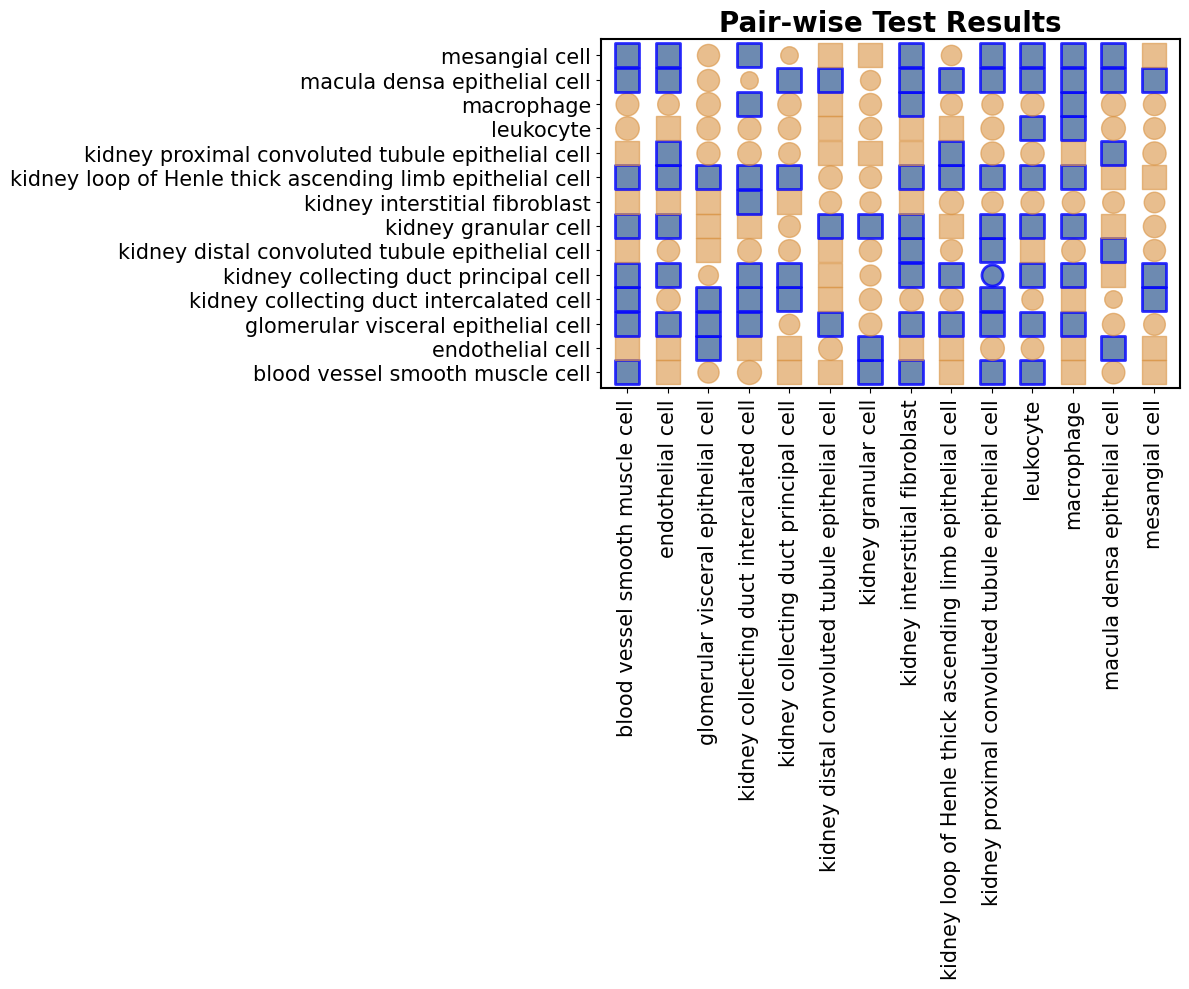

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20  # Adjust title size
plt.rcParams['axes.labelsize'] = 15


variables = wt.obs['cell_type'].cat.categories 
significant_indices = s_index 

p_matrix = abs(np.reshape(fold_change, (14, 14)))

colors = ['#5E1675', '#EE4266', '#FFD23F' , '#337357', '#864AF9', '#FC6736']

# 绘图
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'variables' is a list of variable names and 'significant_indices' represents indices of significant tests
# 'p_matrix' is a 14x14 matrix of p-values

plt.figure(figsize=(12, 10))

for i in range(14):
    for j in range(14):
        fc = p_matrix[i, j]
        size = min(300 *fc, 300)  # Adjust the size based on fold change
        
        # Check if log fold change > 1 for deciding the marker shape
        marker_shape = 's' if fc  > 1 else 'o'
        
        index = i * 14 + j  # Calculate index for checking significance
        if index in significant_indices:
            # For significant results, use a thicker edge and specific color
            plt.scatter(i, j, s=size, marker=marker_shape, edgecolors='blue', linewidth=2, alpha=0.8, color='#486d9e')
        else:
            # For non-significant results, use default edge and another color
            plt.scatter(i, j, s=size, marker=marker_shape, alpha=0.6, color='#d99343')

# Setting axis labels and titles
plt.xticks(ticks=np.arange(len(variables)), labels=variables, rotation=90, fontsize=15)
plt.yticks(ticks=np.arange(len(variables)), labels=variables, fontsize=15)
plt.grid(False)
plt.title('Pair-wise Test Results')

# Show the plot
plt.tight_layout()
plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

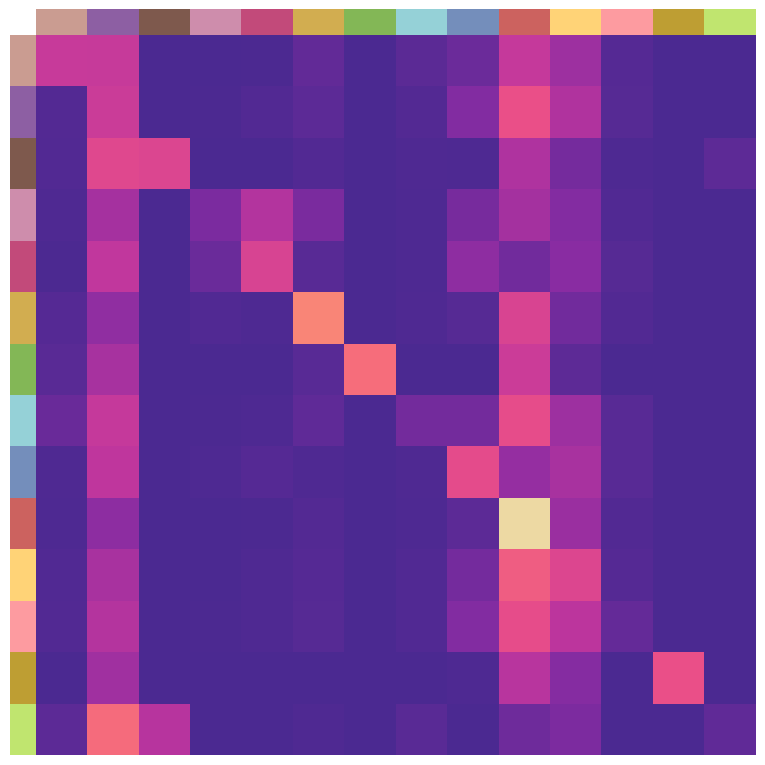

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

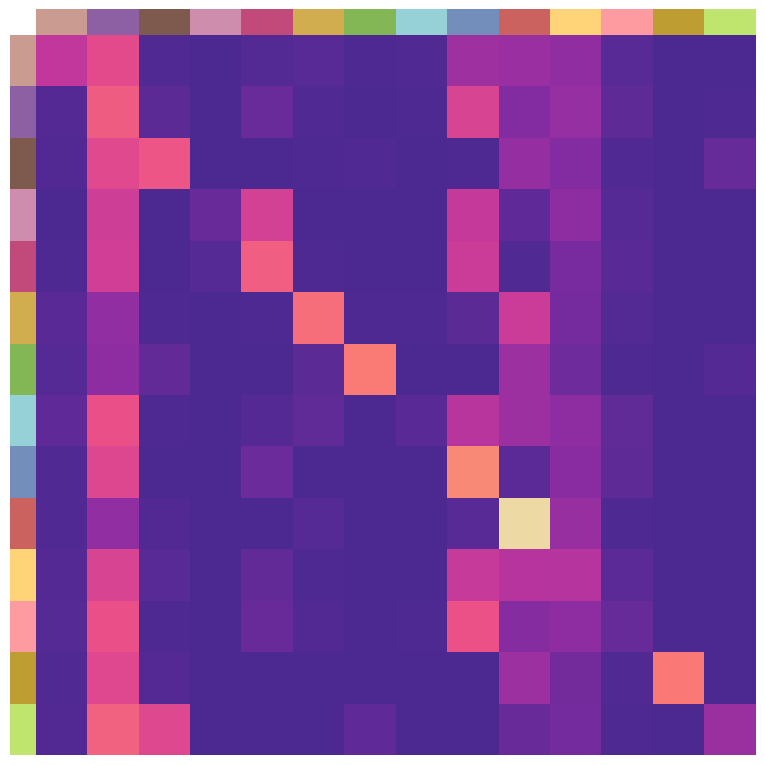

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

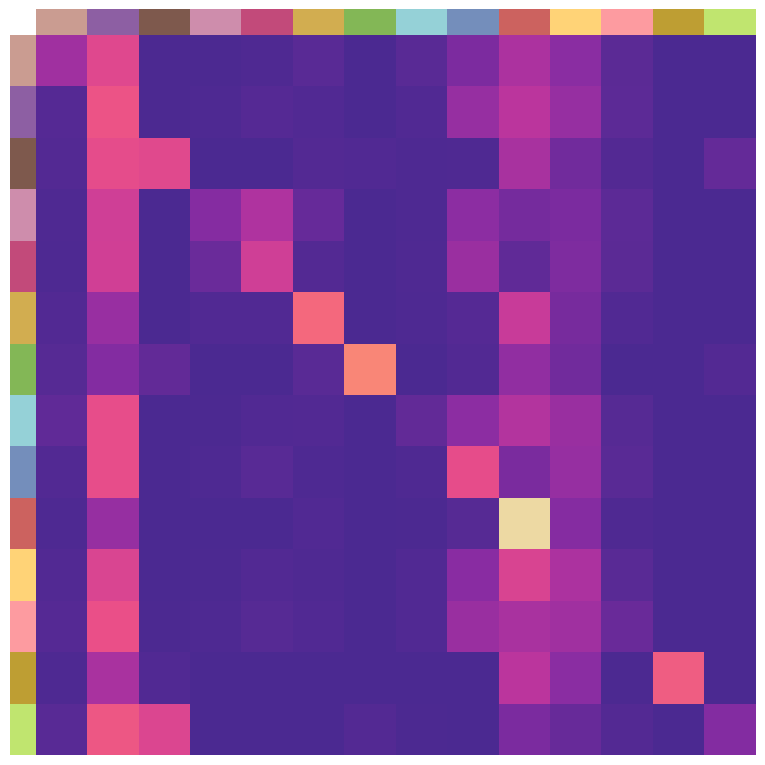

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from palettable.cartocolors.sequential import agSunset_7


palette = ['#CA9C91', '#8D5FA3', '#7E594D', '#CE8DAC', '#C24A7A', '#D2AD50', '#83B756',
           '#95D1D7', '#748EBB', '#CC625F', '#FFD377', '#FD9BA0', '#BE9E33', '#C0E56F']

hex_colors = palette[:14]


data_1 = np.median(np.stack(m_1_1, axis=0).reshape(len(m_1_1), -1), axis=0).reshape(14, 14)
data_2 = np.median(np.stack(m_1_2, axis=0).reshape(len(m_1_2), -1), axis=0).reshape(14, 14)
data_3 = np.median(np.stack(m_1_4, axis=0).reshape(len(m_1_4), -1), axis=0).reshape(14, 14)

import matplotlib.pyplot as plt
norm = plt.Normalize(min(data_1.min(), data_2.min(), data_3.min()), max(data_1.max(), data_2.max(), data_3.max()))

index = [index_1, index_2]

for i, data in enumerate([data_1, data_2, data_3]):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(norm(data), annot=False, ax=ax, cbar=False, cmap=agSunset_7.mpl_colormap)

    ax.set_xticks([])
    ax.set_yticks([])


    for idx, color in enumerate(hex_colors):
        ax.add_patch(patches.Rectangle((idx, 0), 1, -0.5, color=color, clip_on=False, linewidth=0, transform=ax.transData))
        ax.add_patch(patches.Rectangle((0, idx), -0.5, 1, color=color, clip_on=False, linewidth=0, transform=ax.transData))


    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
    plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

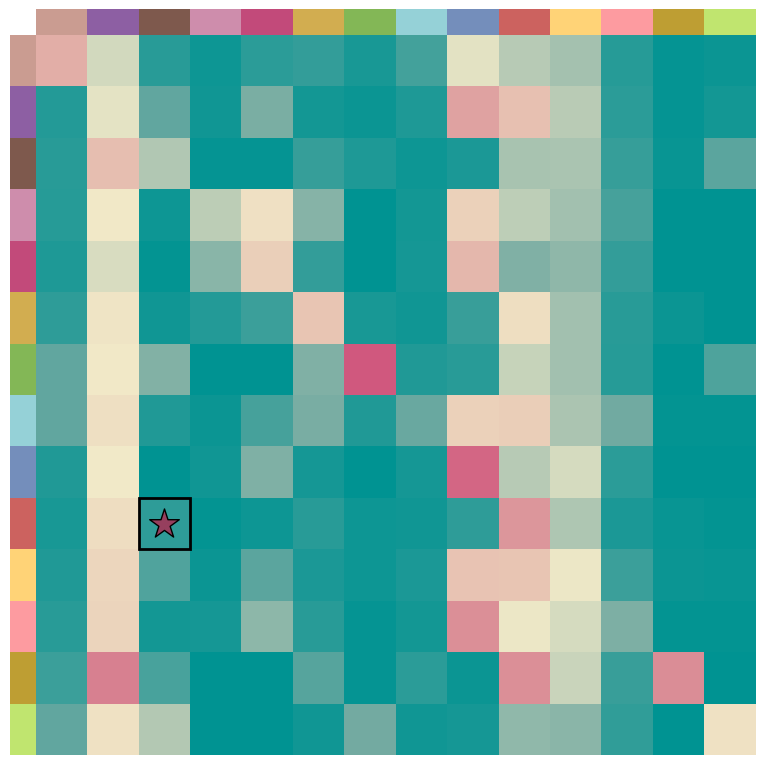

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

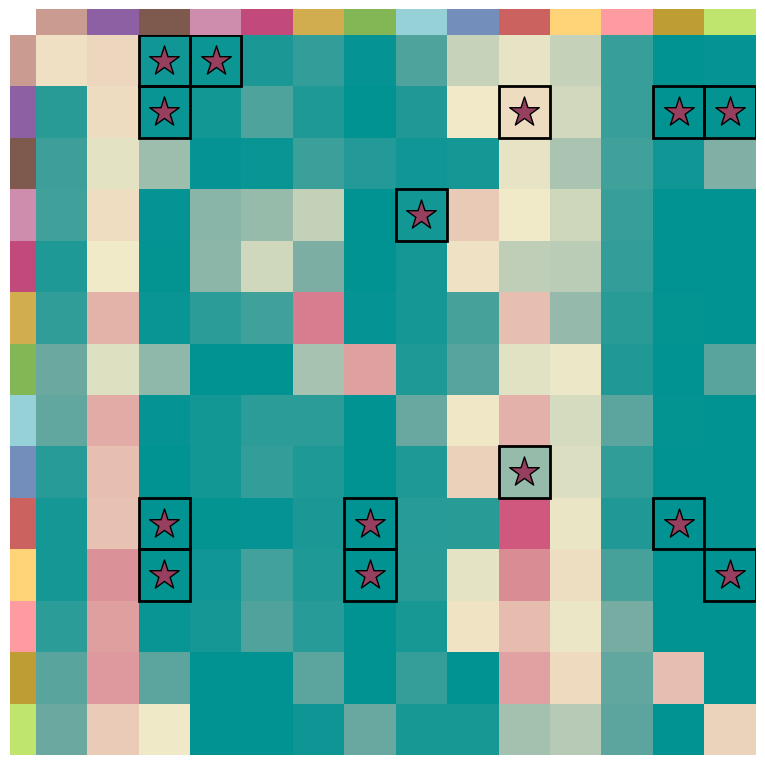

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from palettable.cartocolors.diverging import TealRose_7


data_1 = np.median(np.stack(diff_2, axis=0).reshape(len(diff_2), -1), axis=0).reshape(14, 14)
data_2 = np.median(np.stack(diff_1, axis=0).reshape(len(diff_1), -1), axis=0).reshape(14, 14)



hex_colors = palette[:14]


norm = plt.Normalize(min(data_1.min(), data_2.min()), max(data_1.max(), data_2.max()))

for i, (data, index) in enumerate([(data_1, index_1), (data_2, index_2)]):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(norm(data), annot=False, ax=ax, cbar=False, cmap=TealRose_7.mpl_colormap)  


    ax.set_xticks([])
    ax.set_yticks([])


    targets = [(s // 14, s % 14) for s in index] 
    for row, col in targets:

        rect = patches.Rectangle((col, row), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)
        # Add a star marker at the center of the target cell
        ax.scatter(col + 0.5, row + 0.5, s=500, color='#963F5E', marker='*', edgecolor='black')

    for idx, color in enumerate(hex_colors):
        ax.add_patch(patches.Rectangle((idx, 0), 1, -0.5, color=color, clip_on=False, linewidth=0, transform=ax.transData))
        ax.add_patch(patches.Rectangle((0, idx), -0.5, 1, color=color, clip_on=False, linewidth=0, transform=ax.transData))


    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
    plt.show()